## Performance Metric
The performance metric for our classification task is the accuracy (also known as "classification rate"). It is the fraction of predictions our model got right. For binary classification, accuracy can be calculated in terms of positives and negatives as follows:

**Accuracy =(TP+TN)/(TP+TN+FP+FN)**
> where; 
> * TP ---> True Positives 
> * TN ---> True Negatives 
> * FP ---> False Positives 
> * FN ---> False Negatives.

### Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Loading training and testing datasets and set row_id as index for all the datasets
train_values = pd.read_csv("train_values.csv",index_col='row_id')
train_labels = pd.read_csv("train_labels.csv",index_col='row_id')
test_values = pd.read_csv("test_values.csv",index_col='row_id')
submission = pd.read_csv("submission_format.csv")

In [3]:
print("The train values consist of {} observations and {} feature columns.".format(train_values.shape[0],train_values.shape[1]))
print("The train labels consist of {} observations and a single column.".format(train_labels.shape[0]))
print("The test values consists of {} observations and {} feature columns.".format(test_values.shape[0],test_values.shape[1]))

The train values consist of 500000 observations and 21 feature columns.
The train labels consist of 500000 observations and a single column.
The test values consists of 500000 observations and 21 feature columns.


In [4]:
# displaying the first 5 rows of the training values
train_values.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,3,1,178.0,3,369,52,299,1,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,1,3,1,163.0,3,16,10,306,2,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,1,1,1,1,155.0,1,305,47,180,2,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,1,1,1,1,305.0,3,24,37,20,2,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [5]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 21 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [6]:
# Descriptive statistics for the numeric features. Have transposed to prevent scrolling horizontally
train_values.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_type,500000.0,1.366276,0.690555,1.000,1.00000,1.000,2.00,4.0
property_type,500000.0,1.047650,0.231404,1.000,1.00000,1.000,1.00,3.0
loan_purpose,500000.0,2.066810,0.948371,1.000,1.00000,2.000,3.00,3.0
occupancy,500000.0,1.109590,0.326092,1.000,1.00000,1.000,1.00,3.0
loan_amount,500000.0,221.753158,590.641648,1.000,93.00000,162.000,266.00,100878.0
preapproval,500000.0,2.764722,0.543061,1.000,3.00000,3.000,3.00,3.0
msa_md,500000.0,181.606972,138.464169,-1.000,25.00000,192.000,314.00,408.0
state_code,500000.0,23.726924,15.982768,-1.000,6.00000,26.000,37.00,52.0
county_code,500000.0,144.542062,100.243612,-1.000,57.00000,131.000,246.00,324.0
applicant_ethnicity,500000.0,2.036228,0.511351,1.000,2.00000,2.000,2.00,4.0


In [7]:
# displaying the first 5 rows of the training labels
train_labels.head()

,accepted
row_id,
0,1
1,0
2,1
3,1
4,1


In [8]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 1 columns):
accepted    500000 non-null int64
dtypes: int64(1)
memory usage: 7.6 MB


In [9]:
train_labels['accepted'].value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

# DATA EXPLORATION & Visualization

### Univariate Analysis (Categorical features) Using the unmodified train_values

The categorical features are:
1. loan_type  
2. property_type
3. loan_purpose 
3. occupancy
5. preapproval 
6. msa_md 
7. state_code 
8. county_code
9. applicant_ethnicity
10. applicant_race 
11. applicant_sex
12. co_applicant 
 

1    370827
2     82430
3     39521
4      7222
Name: loan_type, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

A little above 74.2% of the loan applications constituted conventional loans i.e. any loan other than FHA, VA,FSA, or RHS loans. The Federal Housing Administration (FHA-insured) loan represnted a little above 16.5% and Veterans Administration (VA-guaranteed) loans, also formed about 7.9% of the total loan types. The Farm service Agency or Rural Housing Service (FSA/RHS) formed a little above 1.4% of the total loan applications.


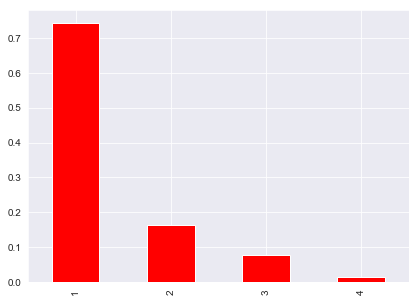

In [10]:
# 1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans). 
# 2 -- FHA-insured (Federal Housing Administration). 
# 3 -- VA-guaranteed (Veterans Administration). 
# 4 -- FSA/RHS (Farm Service Agency or Rural Housing Service).
# proportions of loan types for each type of loan
print(train_values['loan_type'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['loan_type'].value_counts(normalize=True).plot(kind='bar', color='red')
# plt.subplot(122)
# sb.violinplot(x=train_values['loan_type'],orient='vertical')
print('+-+-'*28)
print('')
print("A little above 74.2% of the loan applications constituted conventional loans i.e. any \
loan other than FHA, VA,FSA, or RHS loans. The Federal Housing Administration (FHA-insured) loan represnted a little \
above 16.5% and Veterans Administration (VA-guaranteed) loans, also formed about 7.9% of the total loan types. \
The Farm service Agency or Rural Housing Service (FSA/RHS) formed a little above 1.4% of the total loan applications.")

1    478217
2     19741
3      2042
Name: property_type, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

About 95.6% of the loan applications were for One to four-family dwelling (other than manufactured housing). Around 3.9% of the applications were for manufactured housing, 0.41 % for multifamily dwelling.


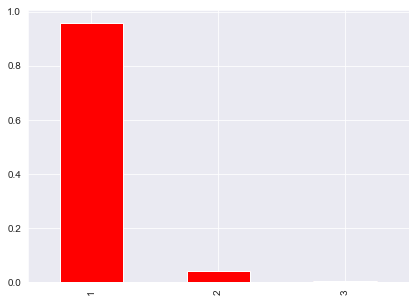

In [11]:
# proportions of property_type for each level of property
# 1 -- One to four-family (other than manufactured housing). 
# 2 -- Manufactured housing. 
# 3 -- Multifamily.
print(train_values['property_type'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['property_type'].value_counts(normalize=True).plot(kind='bar', color='red')
# plt.subplot(122)
# sb.violinplot(x=train_values['property_type'],orient='vertical')
print('+-+-'*28)
print('')
print('About 95.6% of the loan applications were for One to four-family dwelling (other than manufactured housing). \
Around 3.9% of the applications were for manufactured housing, 0.41 % for multifamily dwelling.')

3    242670
1    209265
2     48065
Name: loan_purpose, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

About 48.5% of loan applicants did apply for the loans for the purpose of refinancing other loans. Around 41.8% also  did so for the purpose of home purchasing, and a little below 9.6% applied for the loans to improve their homes.


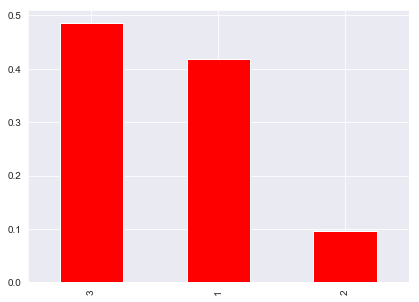

In [12]:
# proportions of loan_purpose for each level of loan purpose
# 1 -- Home purchase. 
# 2 -- Home improvement. 
# 3 -- Refinancing.
# print(sorted(train_values['loan_purpose'].value_counts()))
print(train_values['loan_purpose'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['loan_purpose'].value_counts(normalize=True).plot(kind='bar', color='red')
# plt.subplot(122)
# sb.violinplot(x=train_values['loan_purpose'],orient='vertical')
print('+-+-'*28)
print('')
print('About 48.5% of loan applicants did apply for the loans for the purpose of refinancing other loans. \
Around 41.8% also  did so for the purpose of home purchasing, and a little below 9.6% applied for the loans \
to improve their homes.')

1    447394
2     50417
3      2189
Name: occupancy, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

Over 89.5% of the loan applications related to properties in which the applicants occupied as their principal dwelling. 10.1% of the properties were not owner-occupied and a little below 0.44% of applicants do not relate with the properties, hence, not applicable.


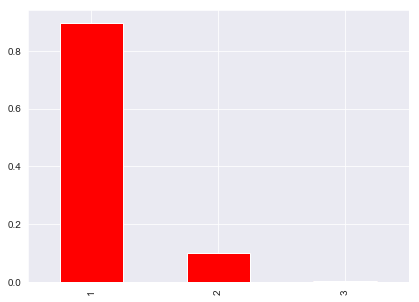

In [13]:
# proportions of occupancy for each level occupancy
# 1 -- Owner-occupied as a principal dwelling. 
# 2 -- Not owner-occupied. 
# 3 -- Not applicable.
print(train_values['occupancy'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['occupancy'].value_counts(normalize=True).plot(kind='bar', color='red')
# plt.subplot(122)
# sb.violinplot(x=train_values['occupancy'],orient='vertical')
print('+-+-'*28)
print('')
print('Over 89.5% of the loan applications related to properties in which the applicants occupied as their principal \
dwelling. 10.1% of the properties were not owner-occupied and a little below 0.44% of applicants do not relate with \
the properties, hence, not applicable.')


3    411109
2     60143
1     28748
Name: preapproval, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

About 5.7% of loan applicants for home purchase loan did request for pre-approval. In about 12.0% of the applications no pre-approval was requested. No indication for pre-approval was shown by the majority of the applicants who represent about 82.2% of the applicants.


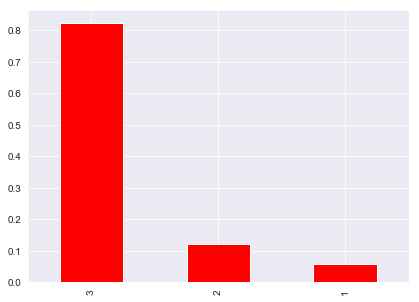

In [14]:
# proportions of preapproval for each level of the preapproval
# 1 -- Preapproval was requested. 
# 2 -- Preapproval was not requested. 
# 3 -- Not applicable.
print(train_values['preapproval'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['preapproval'].value_counts(normalize=True).plot(kind='bar', color='red')
# plt.subplot(122)
# sb.violinplot(x=train_values['preapproval'],orient='vertical')
print('+-+-'*28)
print('')
print('About 5.7% of loan applicants for home purchase loan did request for pre-approval. In about 12.0% of the \
applications no pre-approval was requested. No indication for pre-approval was shown by the majority of the \
applicants who represent about 82.2% of the applicants.')

2    386061
3     57298
1     50822
4      5819
Name: applicant_ethnicity, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

About 77.2% of the loan applicants were neither Hispanic nor Latino. About 11.5% of the applicants did not provide information about their ethnicity either through their mail, internet or telephone applications. About 10.2% of applicants were either Hispanic or Latino and the remaining 1.2% of the applicants were not applicable


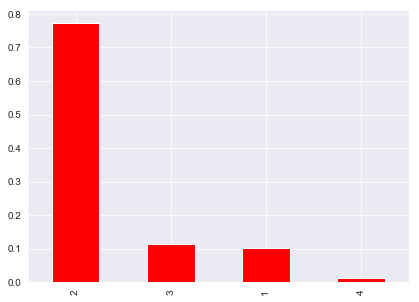

In [15]:
# proportions of applicant_ethnicity for each level of the applicant_ethnicity
# 1 -- Hispanic or Latino. 
# 2 -- Not Hispanic or Latino. 
# 3 -- Information not provided by applicant in mail, Internet, or telephone pplication. 
# 4 -- Not applicable. 
print(train_values['applicant_ethnicity'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['applicant_ethnicity'].value_counts(normalize=True).plot(kind='bar', color='red')
# plt.subplot(122)
# sb.violinplot(x=train_values['applicant_ethnicity'],orient='vertical')
print('+-+-'*28)
print('')
print('About 77.2% of the loan applicants were neither Hispanic nor Latino. About 11.5% of the applicants did not \
provide information about their ethnicity either through their mail, internet or telephone applications. \
About 10.2% of applicants were either Hispanic or Latino and the remaining 1.2% of the applicants were not \
applicable')

5    361538
6     59862
3     40495
2     25756
7      5678
1      4332
4      2339
Name: applicant_race, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

Whites form the majority of loan applicants representing 72.3% of the loan applications. Blacks or African Americans follow next with about 8.1% of the loan applications. Asians constitute about 5.2% and native Hawaiian or other pacific Islanders forming about 0.5% of the total applicants. About 12.0% of loan applicants did not provide information about their race during their mail, internet or telephone applications.


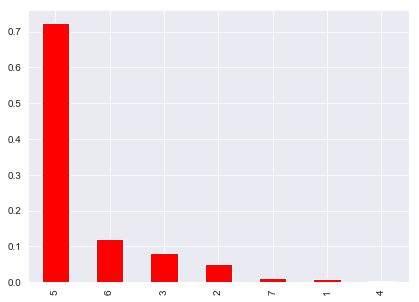

In [16]:
# proportions of applicant_race for each level of the applicant_race
# 1 -- American Indian or Alaska Native. 
# 2 -- Asian. 
# 3 -- Black or African American. 
# 4 -- Native Hawaiian or Other Pacific Islander. 
# 5 -- White. 
# 6 -- Information not provided by applicant in mail, Internet, or telephone application. 
# 7 -- Not applicable. 
# 8 -- No co-applicant.
print(train_values['applicant_race'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['applicant_race'].value_counts(normalize=True).plot(kind='bar', color='red')
# plt.subplot(122)
# sb.violinplot(x=train_values['applicant_race'],orient='vertical')
print('+-+-'*28)
print('')
print('Whites form the majority of loan applicants representing 72.3% of the loan applications. Blacks or African \
Americans follow next with about 8.1% of the loan applications. Asians constitute about 5.2% and native \
Hawaiian or other pacific Islanders forming about 0.5% of the total applicants. About 12.0% of loan applicants did \
not provide information about their race during their mail, internet or telephone applications.')


1    315806
2    142876
3     35643
4      5675
Name: applicant_sex, dtype: int64


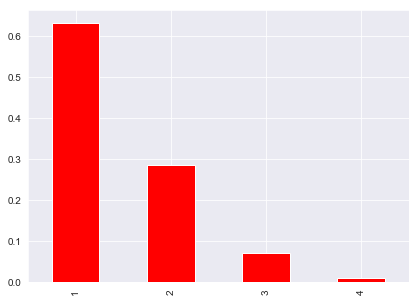

In [17]:
print(train_values['applicant_sex'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['applicant_sex'].value_counts(normalize=True).plot(kind='bar', color='red')

False    299974
True     200026
Name: co_applicant, dtype: int64


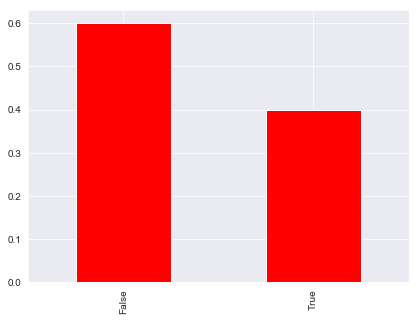

In [18]:
print(train_values['co_applicant'].value_counts())
plt.figure(figsize=(15,5))
plt.subplot(121)
train_values['co_applicant'].value_counts(normalize=True).plot(kind='bar', color='red')

### Univariate Analysis (Numeric features) Using unmodified train_values

The numeric variables are:
1. loan_amount
2. applicant_income
3. population
4. minority_population_pct
5. ffiecmedian_family_income
6. tract_to_msa_md_income_pct
7. number_of_owner-occupied_units
8. number_of_1_to_4_family_units
    
        

count    500000.000000
mean        221.753158
std         590.641648
min           1.000000
25%          93.000000
50%         162.000000
75%         266.000000
max      100878.000000
Name: loan_amount, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++


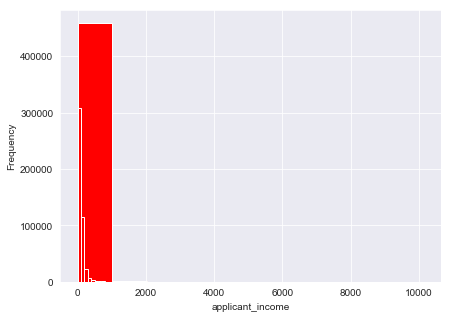

In [20]:
print(train_values['loan_amount'].describe())
print('+++'*15)
# print('+++'*15)
# print(train_values['applicant_income'].describe())

plt.figure(figsize=(15,5))
# oan_amount
# plt.subplot(122)
# train_values['loan_amount'].plot.hist(range=(0,1000), color='red')
# plt.xlabel('loan_amount')

# plt.subplot(121)
# train_values['loan_amount'].plot.hist(color='r')
# plt.xlabel('loan_amount')

plt.subplot(121)
# applicant_income
train_values['applicant_income'].plot.hist(color='r')
plt.xlabel('applicant_income')

plt.subplot(121)
# applicant_income
train_values['applicant_income'].plot.hist(range=(0,1000),color='r')
plt.xlabel('applicant_income')

plt.show()

count    477535.000000
mean       5416.833956
std        2728.144999
min          14.000000
25%        3744.000000
50%        4975.000000
75%        6467.000000
max       37097.000000
Name: population, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++
count    477534.000000
mean         31.617310
std          26.333938
min           0.534000
25%          10.700000
50%          22.901000
75%          46.020000
max         100.000000
Name: minority_population_pct, dtype: float64


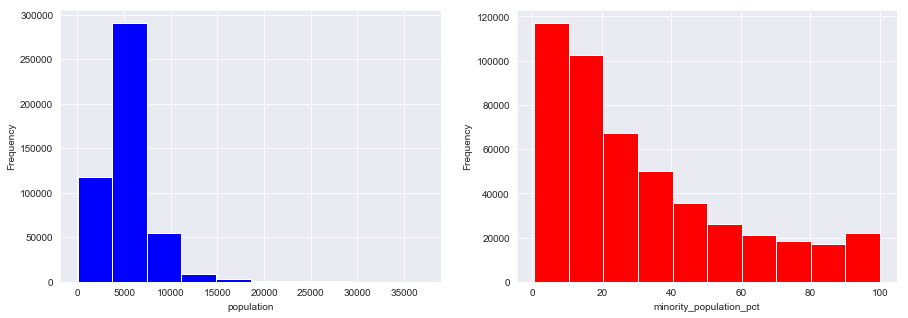

In [21]:
print(train_values['population'].describe())
print('+++'*15)
print('+++'*15)
print(train_values['minority_population_pct'].describe())

plt.figure(figsize=(15,5))
# population
plt.subplot(121)
train_values['population'].plot.hist(color='blue')
plt.xlabel('population')

# minority_population_pct
plt.subplot(122)
train_values['minority_population_pct'].plot.hist(color='red')
plt.xlabel('minority_population_pct')
plt.show()

count    477560.000000
mean      69235.603298
std       14810.058791
min       17858.000000
25%       59731.000000
50%       67526.000000
75%       75351.000000
max      125248.000000
Name: ffiecmedian_family_income, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++
count    477486.000000
mean         91.832624
std          14.210924
min           3.981000
25%          88.067250
50%         100.000000
75%         100.000000
max         100.000000
Name: tract_to_msa_md_income_pct, dtype: float64


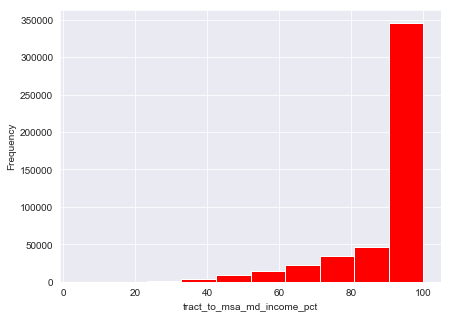

In [22]:
print(train_values['ffiecmedian_family_income'].describe())
print('+++'*15)
print('+++'*15)
print(train_values['tract_to_msa_md_income_pct'].describe())

plt.figure(figsize=(15,5))
# ffiecmedian_family_income
# plt.subplot(121)
# train_values['ffiecmedian_family_income'].plot.hist(color='blue')
# plt.xlabel('ffiecmedian_family_income')

# tract_to_msa_md_income_pct
plt.subplot(122)
train_values['tract_to_msa_md_income_pct'].plot.hist(color='red')
plt.xlabel('tract_to_msa_md_income_pct')
plt.show()

count    477435.000000
mean       1427.718282
std         737.559511
min           4.000000
25%         944.000000
50%        1327.000000
75%        1780.000000
max        8771.000000
Name: number_of_owner-occupied_units, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    477470.000000
mean       1886.147065
std         914.123744
min           1.000000
25%        1301.000000
50%        1753.000000
75%        2309.000000
max       13623.000000
Name: number_of_1_to_4_family_units, dtype: float64


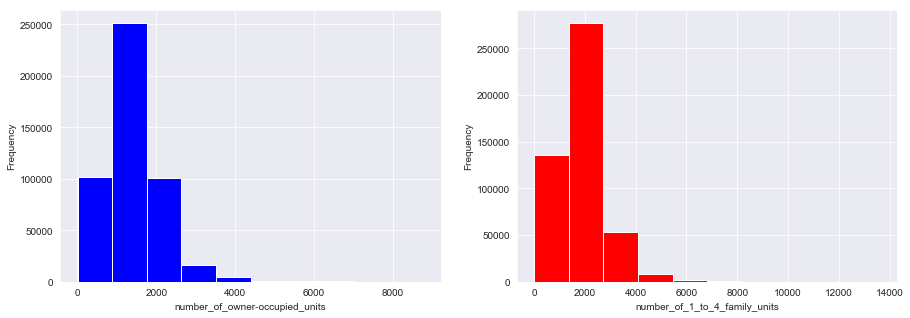

In [23]:
print(train_values['number_of_owner-occupied_units'].describe())
print('+++'*18)
print('+++'*18)
print(train_values['number_of_1_to_4_family_units'].describe())

plt.figure(figsize=(15,5))
# number_of_owner-occupied_units
plt.subplot(121)
train_values['number_of_owner-occupied_units'].plot.hist(color='blue')
plt.xlabel('number_of_owner-occupied_units')

plt.subplot(122)
# number_of_1_to_4_family_units
train_values['number_of_1_to_4_family_units'].plot.hist(color='red')
plt.xlabel('number_of_1_to_4_family_units')
plt.show()

### Bivariate Analysis Using the merged Data

Since the training values and training labels are separated, we will merge the two and make a new dataframe. We will be using the row_id as the key.

In [24]:
# merging our training values with the training labels using row id as ur key
DF = train_values.merge(train_labels,left_on='row_id',right_on='row_id',how='left')
# create a copy of the merged data and work
df = DF.copy()
df.shape

(500000, 22)

#### Loan acceptance rates across ethnicity and gender

accepted                  0       1
applicant_ethnicity                
1                     29100   21722
2                    185109  200952
3                     34451   22847
4                      1226    4593
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Applicants whose ethinicity was 'Not applicable' (where applicant_ethnicity= 4) have a higher loan acceptance rate on average than Hispanic or Latino (where applicant_ethnicity= 1).


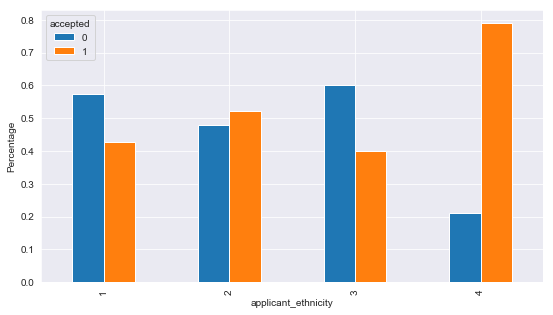

In [25]:
print(pd.crosstab(df['applicant_ethnicity'],df['accepted']))
ethnicity = pd.crosstab(df['applicant_ethnicity'],df['accepted'])
ethnicity.div(ethnicity.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('applicant_ethnicity')
p = plt.ylabel('Percentage')
print('+++'*35)

print("Applicants whose ethinicity was 'Not applicable' (where applicant_ethnicity= 4) have a higher loan acceptance rate on average than Hispanic or Latino (where applicant_ethnicity= 1).")

accepted            0       1
applicant_sex                
1              151327  164479
2               76231   66645
3               21170   14473
4                1158    4517
--------------------------------------------------------------------------------------------------------------

Male appliants (where applicant_sex=1) have a higher loan acceptance rate on average than female applicants (where applicant_sex=2).


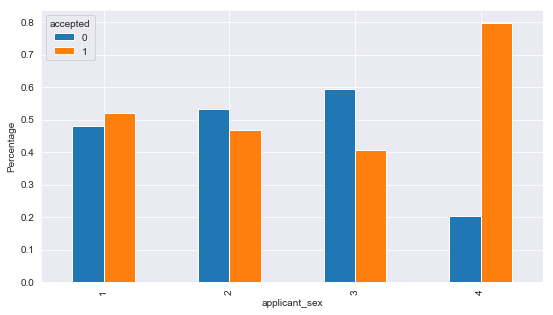

In [26]:
print(pd.crosstab(df['applicant_sex'],df['accepted']))
gender = pd.crosstab(df['applicant_sex'],df['accepted'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('applicant_sex')
plt.ylabel('Percentage')
print('--'*55)
print('')
print('Male appliants (where applicant_sex=1) have a higher loan acceptance rate on average than female \
applicants (where applicant_sex=2).')

accepted             0       1
applicant_race                
1                 2877    1455
2                11930   13826
3                27318   13177
4                 1356     983
5               169230  192308
6                36012   23850
7                 1163    4515
--------------------------------------------------------------------------------------------------------------



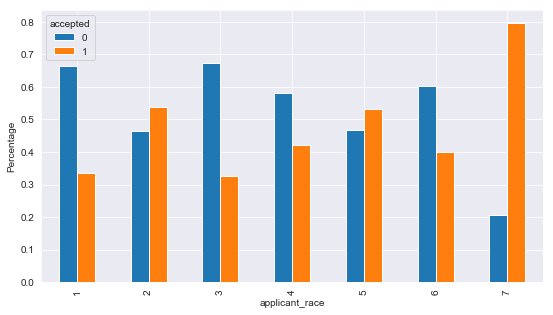

In [27]:
print(pd.crosstab(df['applicant_race'],df['accepted']))
race = pd.crosstab(df['applicant_race'],df['accepted'])
race.div(race.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('applicant_race')
plt.ylabel('Percentage')
print('--'*55)
print('')
# print('Male appliants (where applicant_race=1) have a higher loan acceptance rate on average than female \
# applicants (where applicant_sex=2).')

#### Applicant income and loan amount

In [28]:
# Applicant income and loan amount for only applicants in state 45
df1 = df[df['state_code'] == 45]
print(df1.shape)
# df1.head()

(4638, 22)


The correlation between applicant_income and loan_amount is 0.63
 A higher applicant income is associated with a higher loan amount, on average..


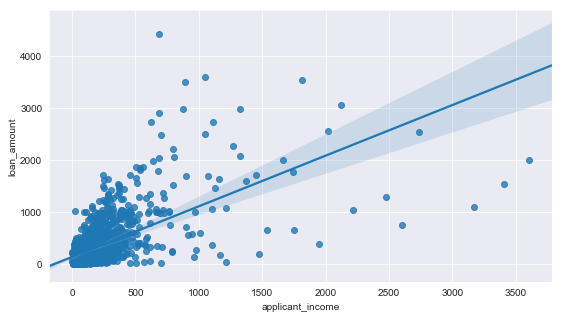

In [29]:
# Regression plot to show the relationship between the two features
plt.figure(figsize=(9,5))
sb.regplot(x='applicant_income',y='loan_amount',data=df1)
print('The correlation between applicant_income and loan_amount is {:0.2f}'.format(df1['applicant_income'].\
                                                                                   corr(df1['loan_amount'])))
print(' A higher applicant income is associated with a higher loan amount, on average..')

#### Loan acceptance across counties in state 48

In [30]:
# Loan acceptance across counties limiting just to state 48 and ignoring where county is missing 
# (missing value being -1)
df2 = df[(df['state_code']==48) & (df['county_code'] != -1)]
print(df2.shape)
# df2.head()

(15711, 22)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde9efb2358>]],
      dtype=object)

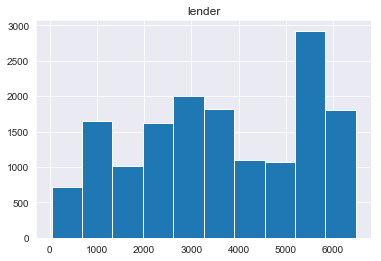

In [31]:
df2.hist(
    column='lender'
       )

In [ ]:
# print(pd.crosstab(df2['state_code'],df2['accepted']).T)
county = pd.crosstab(df['accepted'],df['lender'])
county.div(county.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,6))
plt.xlabel('loan_purpose')
p = plt.ylabel('Percentage')
print('++'*55)
print('')
print('In state 48, the average rate of loan acceptance across counties varies substantially, ranging from \
around 30% to around 70%.')

KeyboardInterrupt: 

In [ ]:
df.groupby('lender')['accepted'].mean().max()


#### Loan types across states looking just at states 2 and 4

In [ ]:
# Loan types across states looking just at states 2 and 4
df3 = df[(df['state_code']==2) | (df['state_code'] == 4)]
print(df3.shape)
# df3.head()hist

In [ ]:
print(df3.groupby(['state_code','loan_type'])['accepted'].value_counts(normalize=True))
loantyp = df3.groupby(['state_code','loan_type'])['accepted'].value_counts(normalize=True)
loantyp.div(loantyp.sum(0).astype(float)).plot(kind="bar", stacked=False, figsize=(14,5))
plt.xlabel('loan_type')
p = plt.ylabel('Percentage')
print('++'*55)
print('')
print('For each of the four loan types, the loan acceptance rate in state 2 is lower than for the corrsponding \
loan type in state 4.')

In [ ]:
Kill it here:

### Removing Outliers 

In [ ]:
# s1 = sb.boxplot(df['loan_amount'], showfliers=True,orient='vertical')
# plt.show()

There are 26312 observations according to Interquartile range that are outliers.

In [ ]:
# q1 = np.percentile(df["loan_amount"],25)
# q3 = np.percentile(df["loan_amount"],75)
# iqr = q3 - q1

# upper = q3 + (1.5*iqr)
# lower = q1 - (1.5*iqr)

# df[(df["loan_amount"] > upper) | (df["loan_amount"] < lower)].shape[0]

Removing outliers using the interquartile range

In [ ]:
# train_iqr = df[(df["loan_amount"] < upper) & (df["loan_amount"] > lower)]
# train_iqr.shape

In [ ]:
# train_iqr['loan_amount'].plot.hist

In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [ ]:
# There are 1842 observations which are outliers according to Z-Score.
# z = (df["loan_amount"] - np.mean(df["loan_amount"]))/np.std(df["loan_amount"])
# (np.absolute(z)>2.5).sum()

# train_z = df[(np.absolute(z) > 2.5)]
# train_z.shape[0]
# Removing outliers using the z-score

# train_z['loan_amount'].plot.hist()

### Dealing with Missing Values

We will combine (concatenate) the training and testing values and perform the data cleaning exercise on both at once.

In [ ]:
# checking for missing values in our merged data
df.isnull().sum()

In [ ]:
test_values.isnull().sum()

In [ ]:
col = ['applicant_income','population','minority_population_pct','ffiecmedian_family_income',
'tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']
# This prints out the percentage of data that is missing in each column that has missing values
print('Percentage of missing values in each column in the training data:')
print('+-'*25)
print(df[col].isnull().sum()/(df.shape[0])*100)

In [ ]:
# replacing missing values with the applicant_income mean in the training data
df['applicant_income'].fillna(df['applicant_income'].median(),inplace=True)
# replacing missing values with the population mean
df['population'].fillna(df['population'].median(),inplace=True)
# replacing missing values with the minority_population_pct mean
df['minority_population_pct'].fillna(df['minority_population_pct'].median(),inplace=True)
# replacing missing values with the ffiecmedian_family_income mean
df['ffiecmedian_family_income'].fillna(df['ffiecmedian_family_income'].median(),inplace=True)
# replacing missing values with the tract_to_msa_md_income_pct mean
df['tract_to_msa_md_income_pct'].fillna(df['tract_to_msa_md_income_pct'].median(),inplace=True)
# replacing missing values with the number_of_owner-occupied_units mean
df['number_of_owner-occupied_units'].fillna(df['number_of_owner-occupied_units'].median(),inplace=True)
# replacing missing values with the number_of_1_to_4_family_units mean
df['number_of_1_to_4_family_units'].fillna(df['number_of_1_to_4_family_units'].median(),inplace=True)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
col = ['applicant_income','population','minority_population_pct','ffiecmedian_family_income',
'tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']
# This prints out the percentage of data that is missing in each column that has missing values
print('Percentage of missing values in each column in the testdata:')
print('+-'*25)
print(test_values[col].isnull().sum()/(test_values.shape[0])*100)

In [ ]:
# replacing missing values with the applicant_income mean for testdata
test_values['applicant_income'].fillna(test_values['applicant_income'].median(),inplace=True)
# replacing missing values with the population mean
test_values['population'].fillna(test_values['population'].median(),inplace=True)
# replacing missing values with the minority_population_pct mean
test_values['minority_population_pct'].fillna(test_values['minority_population_pct'].median(),inplace=True)
# replacing missing values with the ffiecmedian_family_income mean
test_values['ffiecmedian_family_income'].fillna(test_values['ffiecmedian_family_income'].median(),inplace=True)
# replacing missing values with the tract_to_msa_md_income_pct mean
test_values['tract_to_msa_md_income_pct'].fillna(test_values['tract_to_msa_md_income_pct'].median(),inplace=True)
# replacing missing values with the number_of_owner-occupied_units mean
test_values['number_of_owner-occupied_units'].fillna(test_values['number_of_owner-occupied_units'].median(),inplace=True)
# replacing missing values with the number_of_1_to_4_family_units mean
test_values['number_of_1_to_4_family_units'].fillna(test_values['number_of_1_to_4_family_units'].median(),inplace=True)

In [ ]:
# We check for duplicate values and remove them
print('There are {} duplicates values in the training data'.format(df.duplicated().sum()))
# Remove duplicates.
df = df.drop_duplicates()
print('There are {} observations in the train data after removing all duplicates.'.format(df.shape[0]))

In [ ]:
df.isnull().sum()

In [ ]:
test_values.isnull().sum()

## Model Building and Selection

I will now explore a number of classification algorithms. Their performance when compared to each other may give a first indication on what the most promising algorithms for the dataset are. I can then focus on these to furtehr optimize the hyperparameters.

For now, I include the following algorithms:

* logistic regression (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Sklearn</a>)
* decison tree classifier (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Sklearn</a>)
* random forest classifier (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Sklearn</a>)
* gradient boosted tree classifier (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">Sklearn</a>)
* xgboosting classifier (<a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html">XGBoost Python API reference</a>)
* support vector classifier (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">Sklearn</a>)

All algorithm are first run using their default values.

In [ ]:
# finding the relationship between the variables
cor =df.corr()
sb.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values, 
           annot = True, annot_kws={'size':13})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('correlation_plot.png')
plt.show()

In [ ]:
couls = np.full((cor.shape[0],),True,dtype=bool)
for i in range(cor.shape[0]):
    for j in range(1+1,cor.shape[0]):
        if cor.iloc[i,j] >= 0.9:
            if couls[j]:
                couls[j] = False
                
                
selected_columns = df.columns[couls]

dff = df[selected_columns]
dff.head()

In [ ]:
# Splitting my cleaned  train data into train and validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
import time

In [ ]:
dropcols = ['accepted']#,'number_of_owner-occupied_units','number_of_1_to_4_family_units']
#dropcols = ['accepted','population','minority_population_pct','ffiecmedian_family_income',
#'tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units','lender']
X = df.drop(columns= dropcols,axis=1)
y = df['accepted']
print(X.shape)
print(y.shape)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)
print(X_train.shape)
print(y_train.shape)
print('+-'*7)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# normalizing data using the standard scaler since the different variables have different scales of measurement
columns_to_scale = X.columns.tolist()
# std_scaler = MinMaxScaler()
# X_train = std_scaler.fit(X_train[columns_to_scale])
# X_train= std_scaler.transform(X_train[columns_to_scale])
# X_test[columns_to_scale] = std_scaler.transform(X_test[columns_to_scale])
# print(X_train.columns)
# print('+-'*50)
# print(X_test.columns)

In [ ]:
# normalizing data using the minmax scaler for the test data
# dropcols = ['state_code','county_code','number_of_owner-occupied_units','number_of_1_to_4_family_units']
# columns_to_scale = test_values.columns.tolist()
# test_values = test_values[columns_to_scale]

#### Logistic Regression

In [ ]:
logit = LogisticRegression()
before = time.time()
logitmodel = logit.fit(X_train,y_train)
logpred = logitmodel.predict(X_test)
print("The accuracy score for the logistic regression is %.2f" % (accuracy_score(logpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)

#### DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5) 
before = time.time()
dtcmodel = dtc.fit(X_train,y_train)
dtcpred = dtcmodel.predict(X_test)
print("The accuracy score for the decision tree classifier is %.2f" % (accuracy_score(dtcpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
# print('The accuracy score for logistic regression is {}'.format(accuracy_score(y_val,ypred)*100))
print('+-'*50)
print('')
# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), dtcmodel.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(dtcmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Decision Tree')
ax.set_ylabel('Normalized Gini Importance')

#### RandomForestClassifier

In [ ]:
# rand= RandomForestClassifier(n_jobs=-1,max_depth=25,n_estimators=500)
# before = time.time()
# randmodel = rand.fit(X_train,y_train)
# randpred = randmodel.predict(X_test)
# print("The accuracy score for the random forest classifier is %.2f" % (accuracy_score(randpred,y_test)*100))
# after = time.time()
# print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))

In [ ]:
rand = RandomForestClassifier(bootstrap=True,criterion = "entropy",
                              n_jobs=-1,
                              max_depth=25,
                              n_estimators=700,
                              random_state=0,
                              class_weight="balanced",
                              max_features=0.5)
randmodel = rand.fit(X_train,y_train)
randpred = randmodel.predict(X_test)
# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,randpred)
roc_score = roc_auc_score(y_test,randpred)
# print(rfAccuracy)
print("The accuracy score for the random forest classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)
print('')

# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), randmodel.feature_importances_, width, color='b')
ax.set_xticks(np.arange(len(randmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
randmodel.feature_importances_

#### xgboost

In [ ]:
# xgb = XGBClassifier()
# before = time.time()
# xgbmodel = xgb.fit(X_train,y_train)
# xgbpred = xgbmodel.predict(X_test)
# print("The accuracy score for the xgboost is %.2f" % (accuracy_score(xgbpred,y_test)*100))
# after = time.time()
# print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
from datetime import datetime
st = datetime.now()
eval_set=[(X_test, y_test)]
clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.01, 
    seed=9616, 
    max_depth=25, 
    gamma=10, 
    n_estimators=1000)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=100)

print(datetime.now()-st)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))

# final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
# dfSub = pd.concat([test_member_id, final_pred.ix[:, 1:2]], axis=1)
# dfSub.rename(columns={1:'loan_status'}, inplace=True)
# dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

print('+-'*50)
print('')
# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Gradient Boosting Classifier')
ax.set_ylabel('Normalized Gini Importance')

Plotting feature importance for choosen model

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))

# feature_importance = est.feature_importances_
# # make importances relative to max importance
# # feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.barh(pos, feature_importance[sorted_idx], align='center', color='g',alpha=0.75)
# plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
# plt.xlabel('Importance', fontsize=18)
# ax.set_ylim(0,11)
# plt.title('Variable Importance', fontsize=18)
# ax.tick_params(labelsize=18)


# plt.savefig(os.path.join(cwd,'images','feature_importance.png'), bbox_inches='tight')

In [ ]:
grad = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=600,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=7,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,)
gradmodel = grad.fit(X_train,y_train)
gradpred = gradmodel.predict(X_test)
# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,gradpred)
roc_score = roc_auc_score(y_test,gradpred)
# print(rfAccuracy)
print("The accuracy score for the random forest classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)
print('')

# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), randmodel.feature_importances_, width, color='b')
ax.set_xticks(np.arange(len(randmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
model_save

### Removing outliers in our training data

Now our data is clean and devoid of missing values

In [ ]:
print(train_scores, valid_scores)
